Mean Longitudinal Coordinates:  -80.589
Mean 2019 PFAS Concentratios: 0.806
Mean 2021 PFAS Concentratios: 0.315

Median Longitudinal Coordinates:  -80.595
Median 2019 PFAS Concentratios:  0.0
Median 2021 PFAS Concentratios:  0.0

Standard Deviation Longitudinal Coordinates:  0.022
Standard Deviation 2019 PFAS Concentratios:  2.788
Standard Deviation 2021 PFAS Concentratios:  1.3


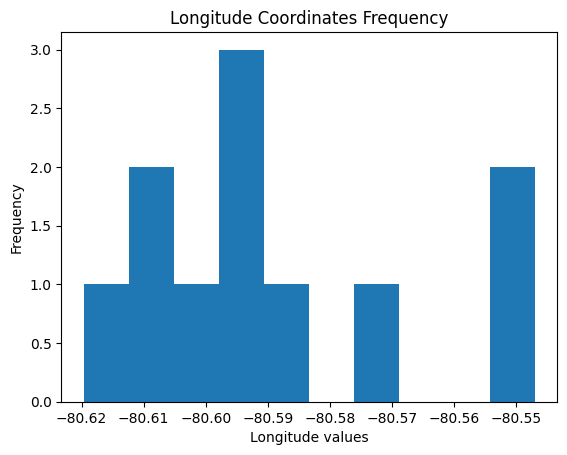

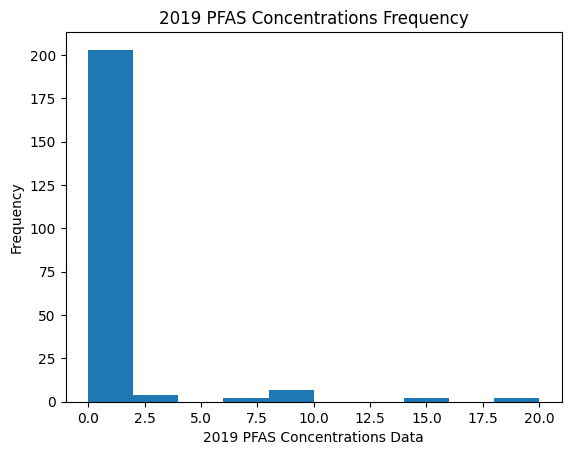

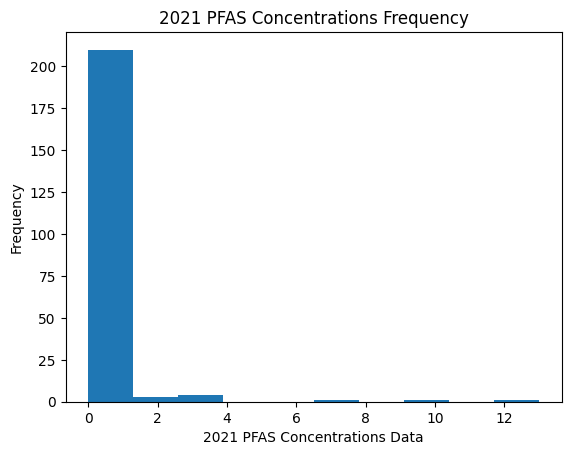

In [27]:
####FINAL PROJECT####
####TASK 1: DATA DESCRIPTION####
import sys
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

###PROCESSING DATA SET SECTION###

#Opens file 
file = open("AnaMaria_Tea_Quiz8.txt", "r")
first = True 
list_of_lists = [] 
data_2021 = []
data_2019 = []
line_header = []
full_data = []

#reads each line in file 
for line in file: 
    #Allows for the header line to not be counted for the total sample count
    if first == True:
        #strips any whitespace or unwanted characters
        line = line.strip()
        #splits the line by tabs 
        data = line.split("\t") 
        #stores header in a variable for later use
        header = data
        first = False
    else:
        #strips data of any whitespace or unwanted characters
        line = line.strip()
        #Splitting the data by the tabs in the file
        data = line.split("\t")
        
        if data[0] == "Longitude":
            long_coordinates = data[1:]
            #full_data.append(data[1:])
        else: 
            #append the processed and split data into the list of lists
            #appending the 2019 and 2021 data into separate lists and then also to a full data list
            if data[0] == "2021":
                data_2021.append(data[1:12])
                full_data.append(data[1:12])
            if data[1] == "2021":
                line_header.append(data[0])
                data_2021.append(data[1:12])
                full_data.append(data[1:12])
            if data[1] == "2019":
                line_header.append(data[0])
                data_2019.append(data[2:13])
                full_data.append(data[2:13])

#converting all of the data values to floats and replacing any invalid data with a zero 
for i in range(len(data_2019)):
    for j in range(len(data_2019[i])):
        if data_2019[i][j] != '-' and data_2021[i][j] != '-':
            data_2019[i][j] = float(data_2019[i][j])
            data_2021[i][j] = float(data_2021[i][j])
        else:
            data_2019[i][j] = float(0)  # Use zero for invalid data
            data_2021[i][j] = float(0)

#Converting the longitudinal coordinates to float types
for i in range(len(long_coordinates)):
    long_coordinates[i] = float(long_coordinates[i])

valid_data_2019 = []
valid_data_2021 = []
valid_long_coordinates = []
for x in range(len(data_2019)):
    for y in range(len(data_2019[x])):
        valid_data_2019.append(data_2019[x][y])
        valid_data_2021.append(data_2021[x][y])
        valid_long_coordinates.append(long_coordinates[y])

#for loop to convert all values in the full data list to float types and invalid data to zeros
for i in range(len(full_data)):
    for j in range(len(full_data[i])):
        if full_data[i][j] != '-' and full_data[i][j] != '-':
            full_data[i][j] = float(full_data[i][j])
        else:
            #Using zero for invalid data
            full_data[i][j] = float(0)  
            full_data[i][j] = float(0)

####TASK 1: DATA DESCRIPTION####

##PART A##

#Mean calculations for the longitudinal values, 2019 data, and 2021 data
mean_long = np.mean(long_coordinates)
mean_2019 = np.mean(data_2019)
mean_2021 = np.mean(data_2021)
print("Mean Longitudinal Coordinates: ", round(mean_long, 3))
print("Mean 2019 PFAS Concentratios:", round(mean_2019, 3))
print("Mean 2021 PFAS Concentratios:", round(mean_2021, 3))

#Median calculations for the longitudinal values, 2019 data, and 2021 data
print()
median_long = np.median(long_coordinates)
median_2019 = np.median(valid_data_2019)
median_2021 = np.median(valid_data_2021)
print("Median Longitudinal Coordinates: ", round(median_long, 3))
print("Median 2019 PFAS Concentratios: ", round(median_2019, 3))
print("Median 2021 PFAS Concentratios: ", round(median_2021, 3))

#Standard Deviation calculations for the longitudinal values, 2019 data, and 2021 data
print()
std_long = np.std(long_coordinates)
std_2019 = np.std(valid_data_2019)
std_2021 = np.std(valid_data_2021)
print("Standard Deviation Longitudinal Coordinates: ", round(std_long, 3))
print("Standard Deviation 2019 PFAS Concentratios: ", round(std_2019, 3))
print("Standard Deviation 2021 PFAS Concentratios: ", round(std_2021, 3))

##PART B##

#Plot the histogram for the frequency of the longitudinal coordinates
plt.hist(long_coordinates)
plt.title("Longitude Coordinates Frequency")
plt.xlabel("Longitude values")
plt.ylabel("Frequency")
plt.show()
#Plot the histogram for the frequency of the 2019 data
plt.hist(valid_data_2019)
plt.title("2019 PFAS Concentrations Frequency")
plt.xlabel("2019 PFAS Concentrations Data")
plt.ylabel("Frequency")
plt.show()
#Plot the histogram for the frequency of the 2021 data
plt.hist(valid_data_2021)
plt.title("2021 PFAS Concentrations Frequency")
plt.xlabel("2021 PFAS Concentrations Data")
plt.ylabel("Frequency")
plt.show()

Pearson Correlation for longitudinal coordinate values with 2019 PFAS Concentration data:  -0.1293
Pearson Correlation for longitudinal coordinate values with 2021 PFAS Concentration data:  -0.1145
Spearman Correlation for longitudinal coordinate values with 2019 PFAS Concentration data:  -0.0499
Spearman Correlation for longitudinal coordinate values with 2021 PFAS Concentration data:  -0.0699

Linear Regression for 2019 PFAS Concentrations and Longitudinal Values:
LinregressResult(slope=-16.385998992763096, intercept=-1319.73070387652, rvalue=-0.12934865629424863, pvalue=0.05540628442489293, stderr=8.507832137864597, intercept_stderr=685.6407184000591)
Linear Regression for 2021 PFAS Concentrations and Longitudinal Values:
LinregressResult(slope=-16.385998992763096, intercept=-1319.73070387652, rvalue=-0.12934865629424863, pvalue=0.05540628442489293, stderr=8.507832137864597, intercept_stderr=685.6407184000591)


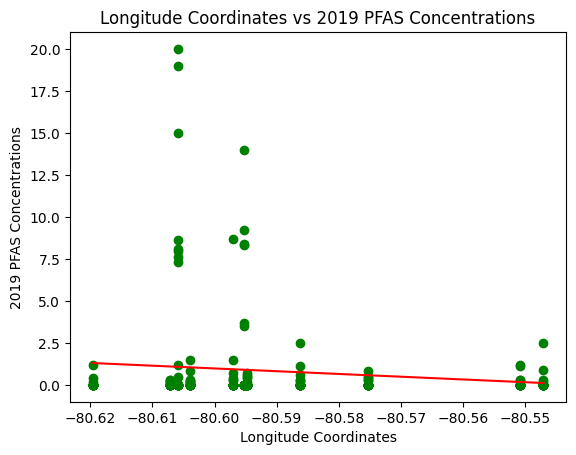

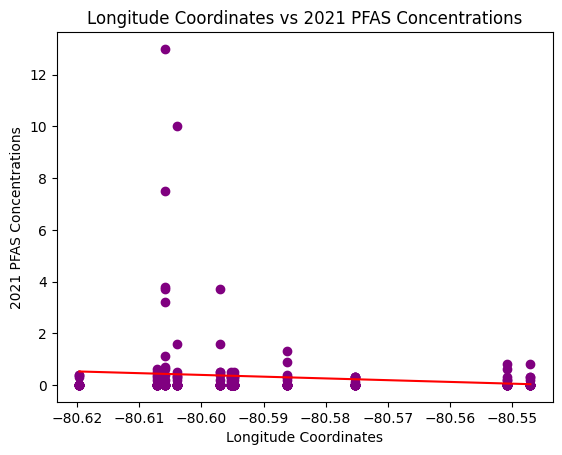

In [28]:
####TASK 2: CORRELATION###

##PART A##

#Calculations for the pearson coeffiecent of 2019 data with the longitudinal coordinate values
res = pearsonr(valid_long_coordinates, valid_data_2019)
correl_p_1 = res.statistic
print("Pearson Correlation for longitudinal coordinate values with 2019 PFAS Concentration data: ", round(correl_p_1, 4))
#Calculations for the pearson coeffiecent of 2021 data with the longitudinal coordinates values
res = pearsonr(valid_long_coordinates, valid_data_2021)
correl_p_2 = res.statistic
print("Pearson Correlation for longitudinal coordinate values with 2021 PFAS Concentration data: ", round(correl_p_2, 4))

#Calcautaions for the spearman coeffiecent of 2019 data with the longitudinal coordinate values
res = spearmanr(valid_long_coordinates, valid_data_2019)
correl_s_1 = res.statistic 
print("Spearman Correlation for longitudinal coordinate values with 2019 PFAS Concentration data: ", round(correl_s_1, 4)) 
#Calculations for the spearman coeffiecent of 2021 data with the longitudinal coordinates values
res = spearmanr(valid_long_coordinates, valid_data_2021)
correl_s_2 = res.statistic 
print("Spearman Correlation for longitudinal coordinate values with 2021 PFAS Concentration data: ", round(correl_s_2, 4))

##PART B##

#linear regression calculations between the longitudinal coordinate values and the 2019 PFAS Concentration data
reg_2019 = linregress(valid_long_coordinates, valid_data_2019, alternative = 'two-sided')
print()
print("Linear Regression for 2019 PFAS Concentrations and Longitudinal Values:")
print(reg_2019)

#linear regression calculations between the longitudinal coordinate values and the 2021 PFAS Concentration data
reg_2021 = linregress(valid_long_coordinates, valid_data_2019, alternative = 'two-sided')
print("Linear Regression for 2021 PFAS Concentrations and Longitudinal Values:")
print(reg_2021)

#reshaping the data to be plotted on a scatter plot
valid_long_coordinates = np.array(valid_long_coordinates).reshape(-1, 1)
valid_data_2019 = np.array(valid_data_2019).reshape(-1, 1)
valid_data_2021 = np.array(valid_data_2021).reshape(-1, 1)

#running a linear regression model between the longitudinal coordinates and the 2019 data
model = LinearRegression()
model.fit(valid_long_coordinates, valid_data_2019)
y_pred = model.predict(valid_long_coordinates)

##PART C##

#plotting a scatter plot of longitudinal coordinate values and 2019 data
plt.scatter(valid_long_coordinates, valid_data_2019, color='green', label='Data Points')
#plotting the linear regression line on the graph
plt.plot(valid_long_coordinates, y_pred, color='red', label='Linear Regression Line')
plt.title("Longitude Coordinates vs 2019 PFAS Concentrations")
plt.xlabel("Longitude Coordinates")
plt.ylabel("2019 PFAS Concentrations")
plt.show()

#running a linear regression model between the longitudinal coordinates and the 2021 data
model = LinearRegression()
model.fit(valid_long_coordinates, valid_data_2021)
y_pred = model.predict(valid_long_coordinates)

#plotting a scatter plot of longitudinal coordinate values and 2021 data
plt.scatter(valid_long_coordinates, valid_data_2021, color='purple', label='Data Points')
#plotting the linear regression line on the graph
plt.plot(valid_long_coordinates, y_pred, color='red', label='Linear Regression Line')
plt.title("Longitude Coordinates vs 2021 PFAS Concentrations")
plt.xlabel("Longitude Coordinates")
plt.ylabel("2021 PFAS Concentrations")
plt.show()

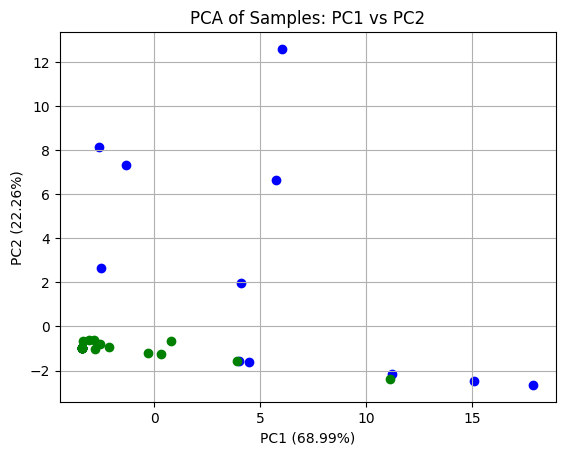

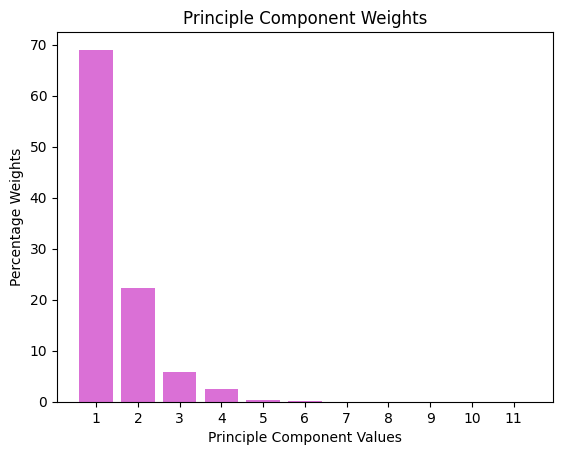

In [29]:
####TASK 3: DIMENTIONALITY REDUCTION####

##PART A###  
    
# Initialize PCA object with components
pca = PCA(n_components=11)

#fit PCA model to the data

combined_data = data_2019 + data_2021 
# Fit PCA model to the combined data

principal_components = pca.fit_transform(combined_data)

##PART C: PLOTTING PC1 AND PC2##
fig, ax = plt.subplots() 

PCX = 0
PCY = 1

#plotting the graphs with PC1 on x-axis and PC2 on y-axis
plt.scatter(principal_components[:19, PCX], principal_components[:19, PCY], c='blue')
plt.scatter(principal_components[20:39, PCX], principal_components[20:39, PCY], c='green')
plt.title('PCA of Samples: PC1 vs PC2')
label_X = "PC1 (" + str(np.round(pca.explained_variance_ratio_[PCX]*100, decimals=2)) + "%)"
label_Y = "PC2 (" + str(np.round(pca.explained_variance_ratio_[PCY]*100, decimals=2)) + "%)"
ax.set_xlabel(label_X)
ax.set_ylabel(label_Y)
plt.grid()
plt.show()

##PART B##

counter = 0
PC_Values = []
PC_weights = []
PCX = 1

#Adding the PCX numbers to a list and appending the weights to another list to be plotted
for x in full_data: 
    if counter < 11: 
        PC_Values.append(PCX)
        PC_weights.append(np.round(pca.explained_variance_ratio_[counter]*100, decimals = 2))
        counter = counter + 1 
        PCX = PCX + 1

#Plotting bar chart of 
fig = plt.figure()
x_axis = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.bar(PC_Values, PC_weights, color = "orchid")
plt.title("Principle Component Weights")
plt.xlabel("Principle Component Values")
plt.ylabel("Percentage Weights")
plt.xticks(ticks=x_axis)
plt.show()